___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression with Python

Logistic Regression a method for classification. Classification = identifying which set of categories new set of observations belong to.
- Logistic Regression = classification with discrete categories (categories = classes)
    - we can't use linear regression on classification models, it won't lead to a good fit
    - we would have to use a logistic regression curve
        - values between 0 and 1 
        - the Sigmoid (aka logistic) Function takes in any value and outputs it to be 0 and 1
- Linear Regression = regression problems predicting continuous value

If you want to understand the math behind Logistic Regression, read Chapter 4-4.3 of Introduction to Statistical Learning by Gareth James

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Sigmoid

Typically used in binary classification tasks looks like an S-curve, and maps real-valued numbers between 0 and 1

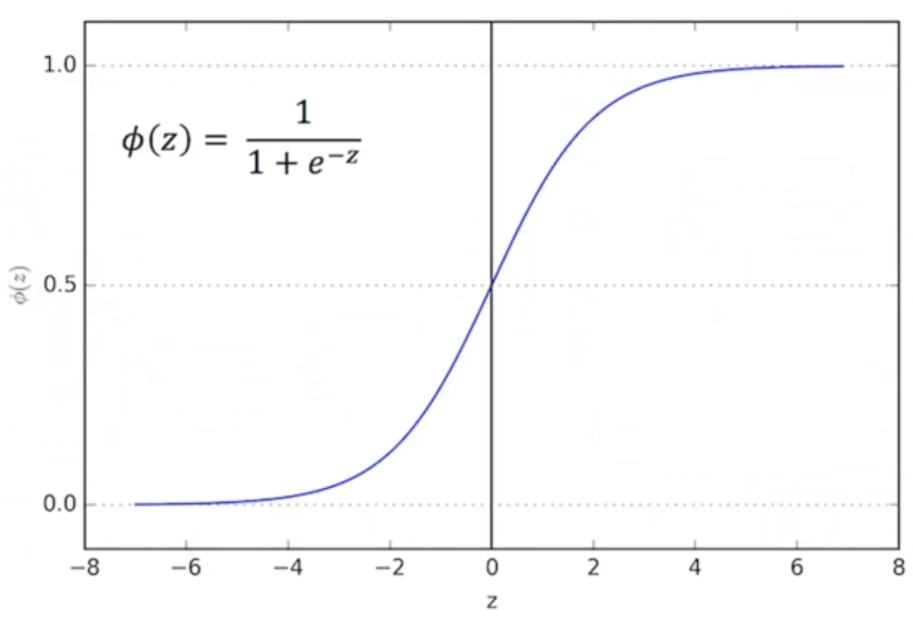

It can take in any value and the value will be between 0 and 1

theta of z = 1 over (1 plus e to the power of -z)
- doesn't matter what value of "z" you put into the sigmoid function, the output on the vertical axis always be between 0 and 1
    - this means we can place our linear regression function into the sigmoid function as "z"


The function is defined below:

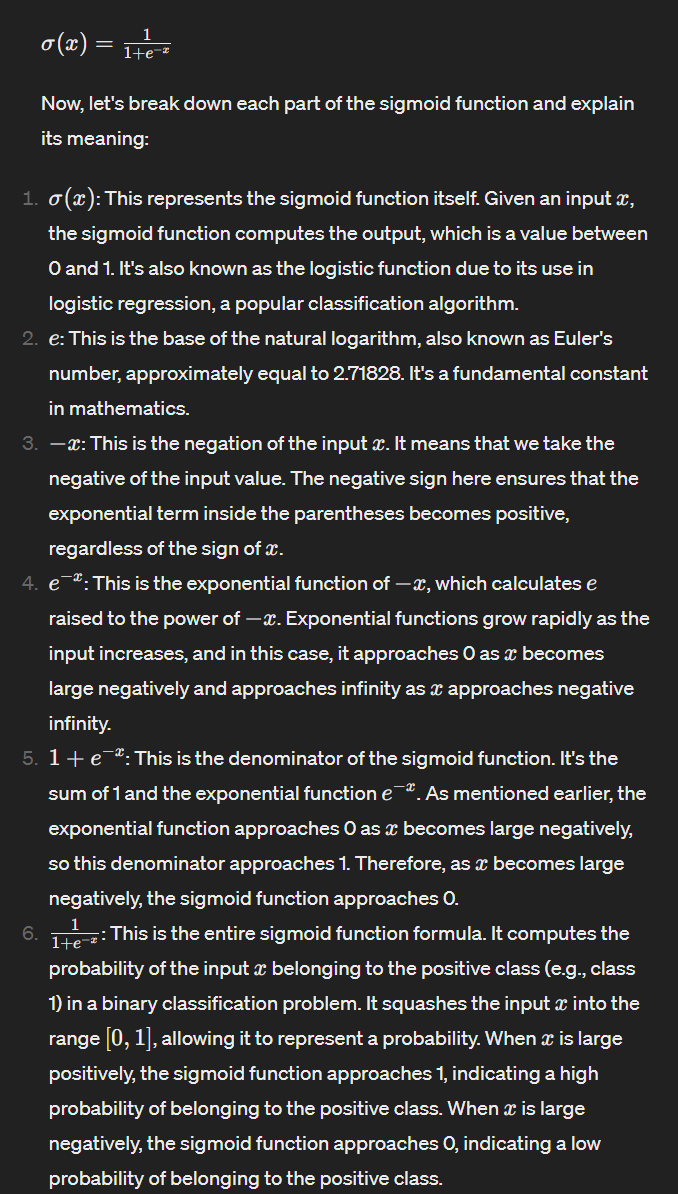


### When we place the linear function as "z" in the sigmoid function, we get:

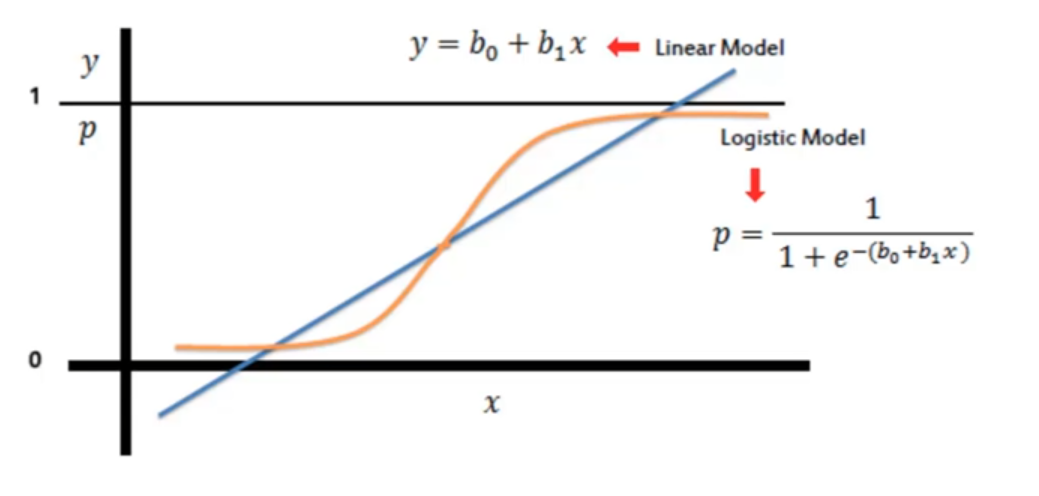

- our linear model followed y= mx+b format (b0 is b, b1 is the slope, x is x)
- by doing this, we can transform our sigmoid function into a logistic model


We set anything equal to 0.5 or below 0.5 as "0" and >0.5 as "1" (binary classification)

## Evaluation:
After training logistic regression model on training data, we'll evaluate model's performance on test data using confusion matrix
- confusion matrix is a table to describe performance of the classification model on test data, where true values are known

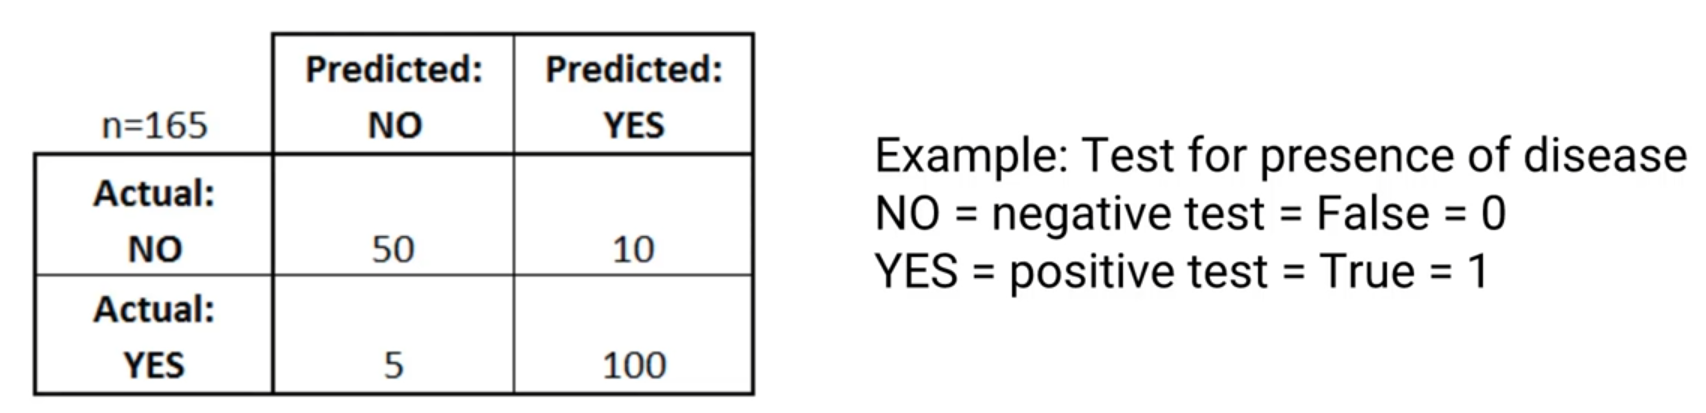
- classifier made 165 predictions (n-sample size is 165) 
    - can conclude 105 patients have the disease and 60 patiences do not

### Basic terminology:
    - true positive (TP)
    - true negative (TN)
    - false positive (FP, type 1 error)
    - false negative (FN, type 2 error)
    
### Accuracy:
    - overall how often correct is it? 
    - (true negative + true positive)/total predictions = 150/165 = 0.91 (91% accuracy)
    
### Misclassification rate:
    - overall, how often is it wrong?
    - (FP + FN)/total = 15/165 = 0.09 (or 1 - 0.91), 9% misclassification rate

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
# this dataset is already semi-clean, original dataset is Kaggle.com

train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

# survived is 0 if did not survive
# Pclass = passenger class (first class, second class, etc.)
# SibSp = sibling or spouse aboard
# Parch = parent or children aboard
# Fare = ticket price
# Cabin = which cabin they were in
# Embarked = where they embarked from 


# we are going to have missing data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data
- Use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
train.isnull()

# ".isnull()" method will show where the data is missing (true = missing info, false = not missing info)
# "NaN" will come up as "True"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

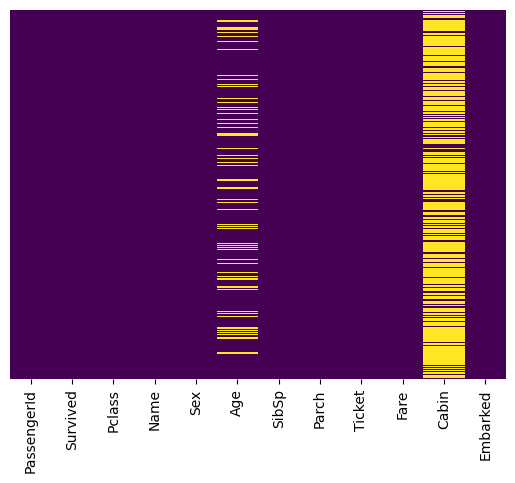

In [5]:
# we can actually use the data above to make a heatmap 

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# "yticklabels=False" so we don't get tick labels (numbers on the y axis)
# "cbar=False" because we don't get a color bar on the right
# "cmap='viridis'" - this is the color code for the background and the color of the markers

In [6]:
# every yellow dash is stands for a true point where "True" it was "null" - A.K.A. yellow = missing info
# we are missing some age info, a lot of cabin info

# roughly 20% of the age information is missing, and this is a small enough margin for reasonable replacement with some form of
# imputation

About 20% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation (meaning I can use the knowledge of other columns to fill in reasonable values for the age column). 

Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

- Imputation is a technique in data preprocessing to handle missing values in a dataset. When data is missing, imputation involves replacing missing values with estimated or predicted values based on the available data (like drawing bridges where there are gaps). This process helps ensure that the dataset is complete and suitable for analysis. It IS possible to potentially introduce bias or uncertainty into the data by doing this, which may affect the accuracy of the predictions to some extent (but this will depend on quality of the imputation, amount of missing data, relation of missingness to outcome, model sensitivity, and evaluation metrics). 

1. Identifying Missing Values: Before imputation can be performed, missing values in the dataset need to be identified. Missing values can take various forms, such as NaN (Not a Number), NULL, NA (Not Available), or placeholders like "N/A" or "-9999".

2. Selecting Imputation Method: There are several imputation methods available, each with its own assumptions and characteristics. Common imputation methods include:
    - Mean/Median Imputation: Replace missing values with the mean or median of the observed values for that feature.
    - Mode Imputation: Replace missing categorical values with the mode (most frequent value) of the observed values for that feature.
    - Regression Imputation: Predict missing values using a regression model based on other features in the dataset.
    - K-Nearest Neighbors (KNN) Imputation: Replace missing values with the average of nearest neighbors' values in the feature space.
    - Multiple Imputation: Generate multiple imputed datasets and combine them to account for uncertainty in imputation.
    - Custom Imputation: Use domain knowledge or specific algorithms tailored to the dataset's characteristics.

3. Performing Imputation: Once the imputation method is chosen, missing values are replaced with imputed values according to the selected strategy. This can be done using libraries or functions available in data analysis tools like Python's scikit-learn, R's caret, or specialized libraries like fancyimpute.

4. Evaluation: After imputation, it's essential to evaluate the impact of imputation on the dataset's characteristics and downstream analysis or modeling tasks. This may involve examining summary statistics, visualizations, or model performance metrics before and after imputation to ensure that imputation does not introduce bias or distort patterns in the data.

<AxesSubplot:xlabel='Survived', ylabel='count'>

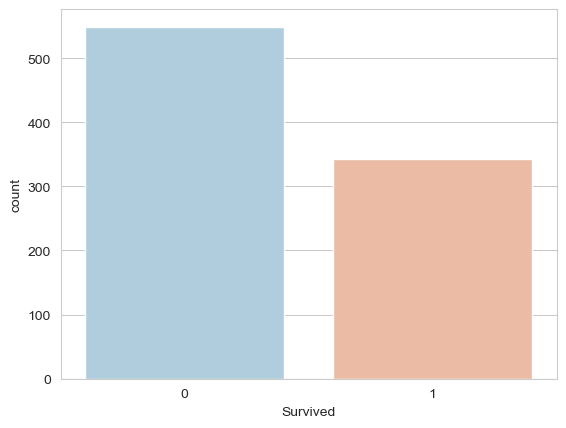

In [7]:
sns.set_style('whitegrid') # this is just the style of the graph

# i just want to know who survived, and who didn't survive
sns.countplot(x='Survived',data=train,palette='RdBu_r')

# almost 2x people did not survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

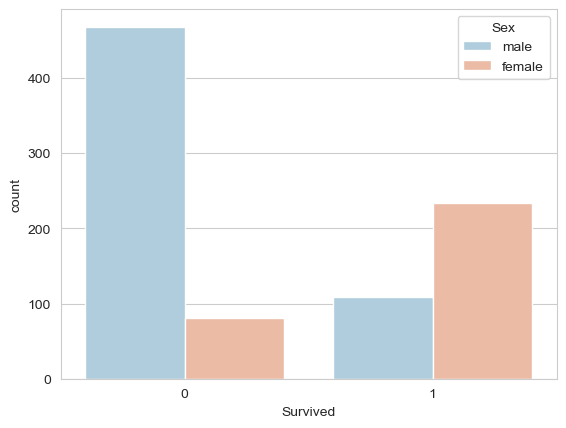

In [8]:
sns.set_style('whitegrid')

sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r') # palette is for coloring

# there is a trend
# people that did not survive were more likely to be male
# people that did survive were more likely to be female (almost twice as likely)

# we will then examine what coefficients that led to somebody surviving
# coefficients are weights or parameters are the values assigned to each feature in a model that indicate the strength of the
# relationship between features and target variable

# features are predictors or independent variables (they are the input variables used by a ML model to make predictions)
# features represent the characteristics or attributes of the data used to learn patterns or relationships between input and 
# output variables (for example: housing prices, features are # of bedrooms, squarte footage, location, etc.)

<AxesSubplot:xlabel='Survived', ylabel='count'>

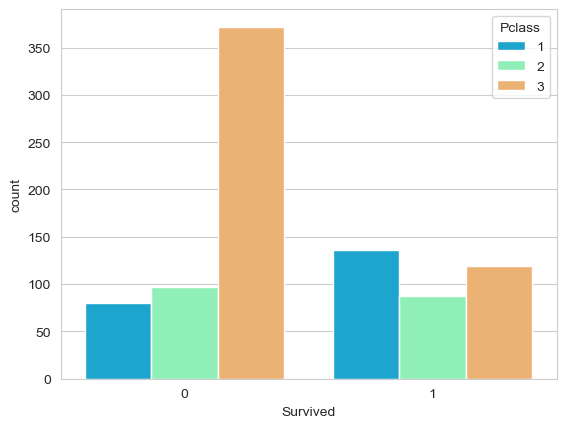

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

# people that did not survive were overwhelmingly part of third class (cheapest class)

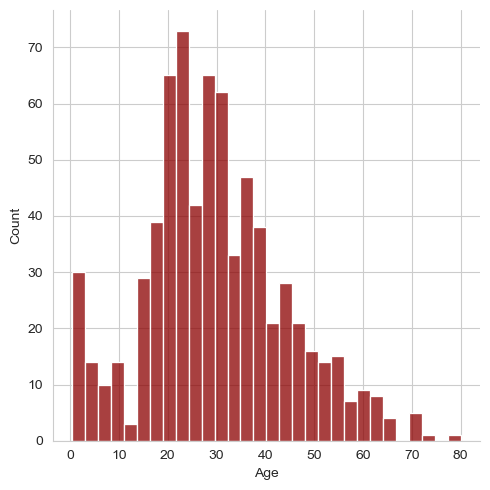

In [10]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

# '.dropna()' is to drop the null values that might mess up the plot

# it almost looks like bimodal distribution where you have young passengers (from 0 to 10 years old) and ages 20-30 ish

<AxesSubplot:ylabel='Frequency'>

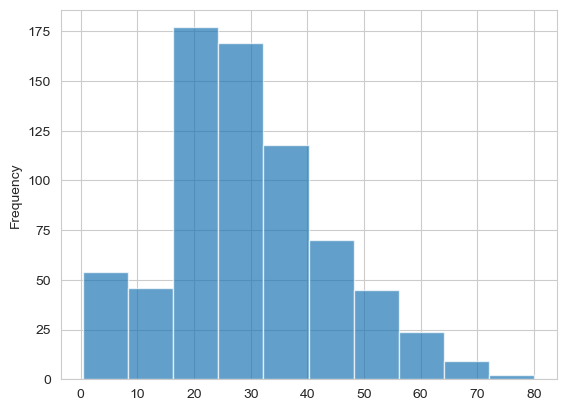

In [11]:
train['Age'].plot.hist(bins=10,alpha=0.7)

# "bins= " is how bars there are in the bar graph

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

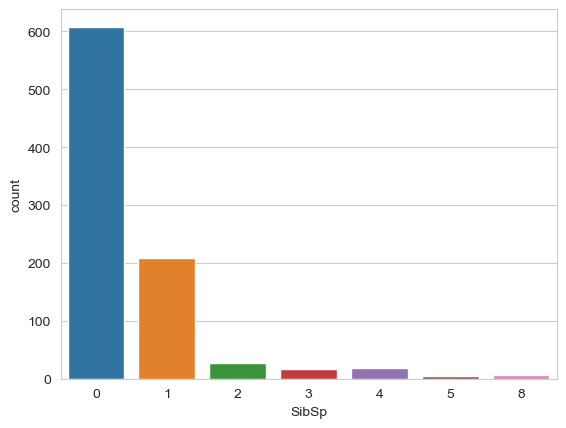

In [13]:
sns.countplot(x='SibSp',data=train)

# most people on board did not a sibling or spouse on board

In [14]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:>

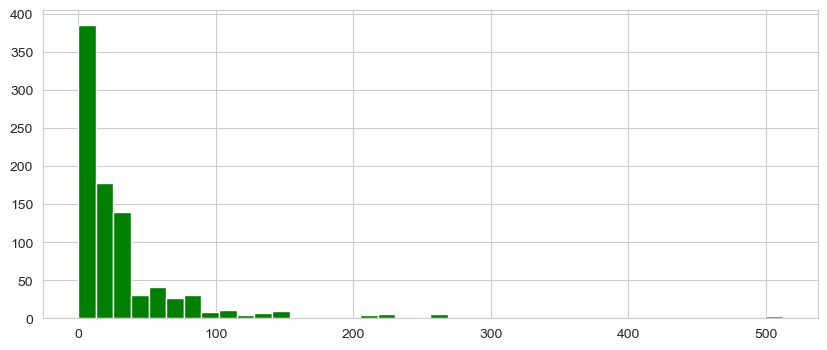

In [15]:
train['Fare'].hist(color='green',bins=40,figsize=(10,4))

# this makes sense because most passengers are in the third class so their tickets would be cheaper
# these also make sense because titanic was in 1912 and fares were cheaper back then

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [16]:
import cufflinks as cf

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [17]:
cf.go_offline() 
# tell cufflinks we want to operate offline

NameError: name 'cf' is not defined

In [18]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

AttributeError: 'Series' object has no attribute 'iplot'

___
## Data Cleaning

### Step 1 (clean missing values):
- We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
    - However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

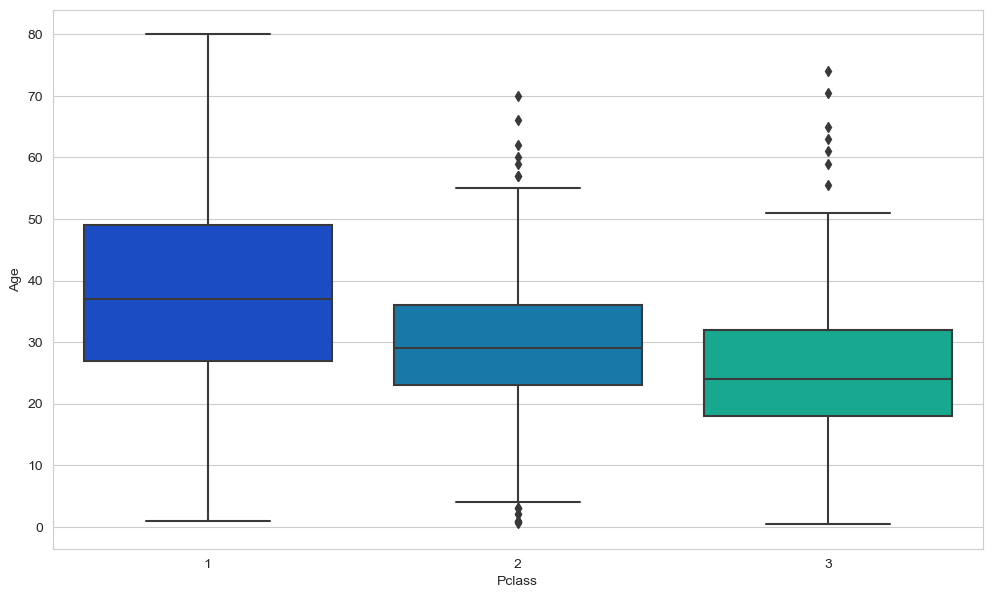

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

# when we separate by class, the wealthier passengers by first class and second class tend to be older than third class
# we can use average age values to impute the average age of passenger class
# we can technically create a model to predict the age of all the passengers based off of features but it's not necessary

In [20]:
train[train['Pclass'] == 1]['Age'].median()

# the age of people who are first class median is 37 from the training data

37.0

In [21]:
train[train['Pclass'] == 2]['Age'].median()

# median age of second class is 29 yrs old

29.0

In [22]:
train[train['Pclass'] == 3]['Age'].median()

24.0

In [23]:
def impute_age(cols):
    # the function takes in a single parameter "(cols)" which represents a single row of data from the dataset
     
    Age = cols[0] # "cols[0]" says the first input of the "(cols)" parameter corresponds to the age of the passenger
    Pclass = cols[1] # "cols[1]" is the second input of the "(cols)" parameter corresponding to passenger class
    
    # technically, you can do "Age=cols[0]" and "Pclass = cols[2]" but that means something will need to be assigned to
    # "cols[1]" and applying that function will need to be "train[['Age','_something_','Pclass']].apply(impute_age,axis=1)"
    
    
    # checking if the values for "Age" column in the pd dataframe is missing using "pd.isnull(Age)"
    if pd.isnull(Age):
        # if they are first class
        if Pclass == 1:
            return 37
        # if they are second class
        elif Pclass == 2:
            return 29
        # all else 
        else:
            return 24
    # if the age is not missing, just return the age number
    else:
        return Age

In [24]:
# apply that function
# turns out "(cols)" parameter is 1 argument, but the argument can actually be specified to be a 2 object list given cols[0] 
# and cols[1] 

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

# created a function that takes in the argument "cols"

<AxesSubplot:>

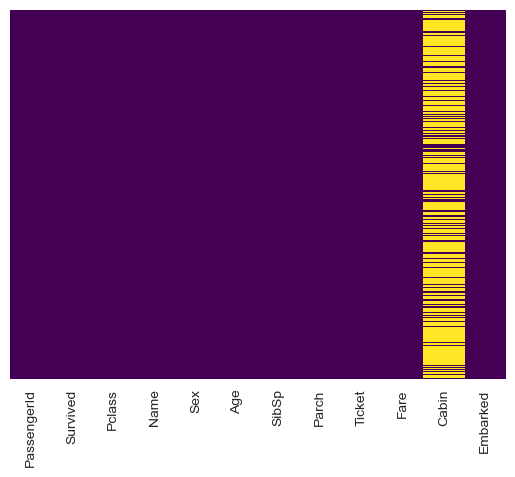

In [25]:
# check the heat map again to make sure we don't have any nulls in "Ages"
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# we reasonably guessed people's ages for their passenger class so we don't have missing units
# cabin is too many missing points to do anything useful with the column

We should just drop the Cabin column and the row in Embarked that is NaN.

In [26]:
train.drop('Cabin',axis=1,inplace=True)

In [27]:
train.head()

# no longer have cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
# drop any more missing values

train.dropna(inplace=True)

<AxesSubplot:>

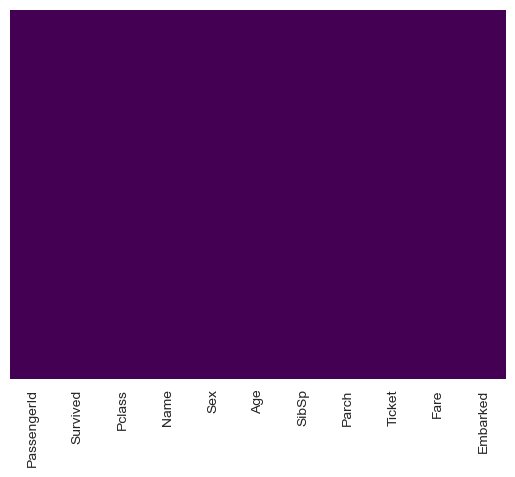

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

# one solid color, no missing values 

### Step 2 (Converting Categorical Features): 
- convert categorical features to dummy variables using pandas otherwise our ML algorithm won't be able to directly take in those features as inputs 
- this is known as "encoding"
    - ex: change the string "male" and "female" to "0" or "1" into a dummy variable so that the ML algorithm can read it
    - ex: "Embarked" column is a 1-letter string representing city, ML algorithm can't understand that
- we will do this in pandas

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


#### Multicollinearity
- Refers to when two or more predictor variables in a regression model are highly correlated with each other, where there is a strong linear relationship amongst variables (if sex is male means not female)
    - correlation among predictors: multicollinearity typically arises when there are high correlations among the predictor variables in the regression model meaning that changes in one predictor variable associates with changes in another predictor variable
    - affects regression analysis: (1) it causes the regression coefficients to have high standard errors which make them unstable and difficult to interpret, (2) causes difficulty in determining individual effects of each predictor variable on the dependent variable, (3) it also causes inflation of variance of the regression coefficients which lead to less precise estimates, and (4) lastly causes difficulty identifying the true importance of predictor variables, making it difficult to identify which predictors are significant
    - detecting multicollinearity: correlation matrix (calculating matrix among the predictor varialbles to identify strong correlations, variance inflation factor (computing the VIF for each predictor variable where VIF value greater than 5 or 10 indicates multicollinearity), condition number (examining the condition number of the design matrix where a high condition number suggests multicollinearity)
    - addressing mutlicollinearity in regression analysis: removing highly correlated predictors (dropping one from the model), principal component analysis (PCA) to reduce dimensionality of the predictor variables and create orthogonal components that are uncorrelated, ridge regression using regularization techniques which penalize large regression coefficients and can help mitigate the effects of multicollinearity
    
    
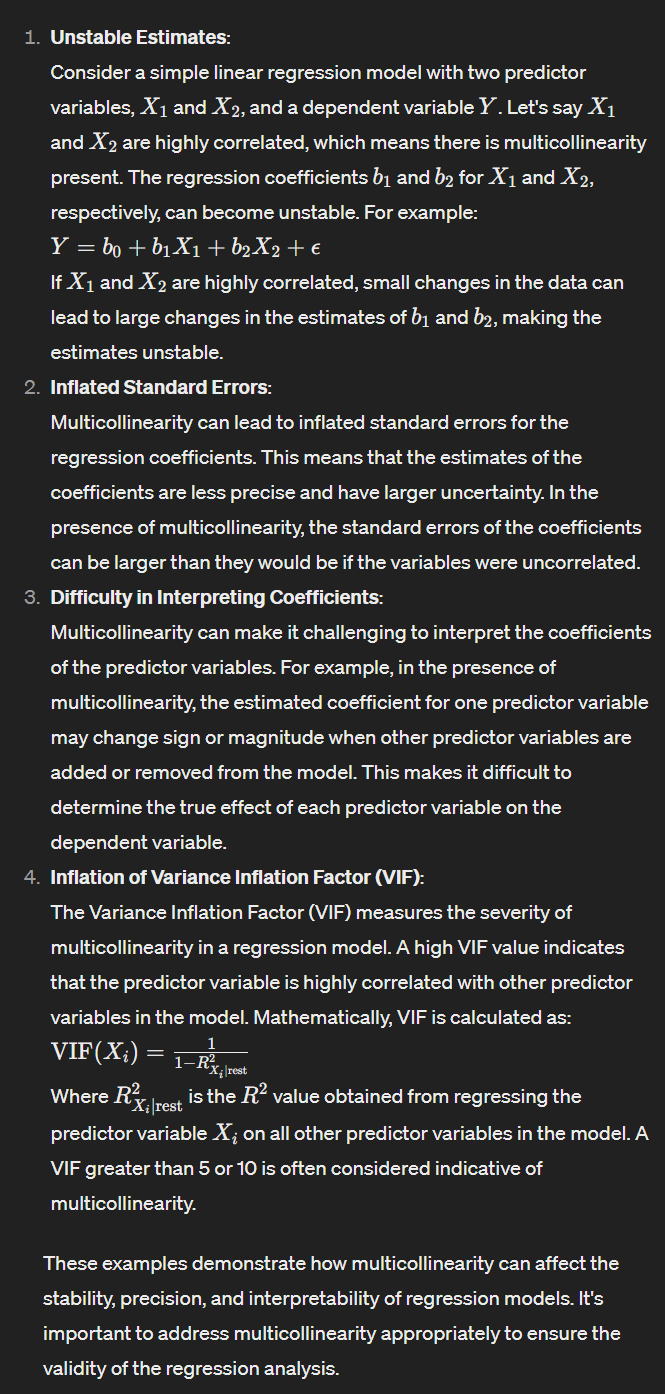

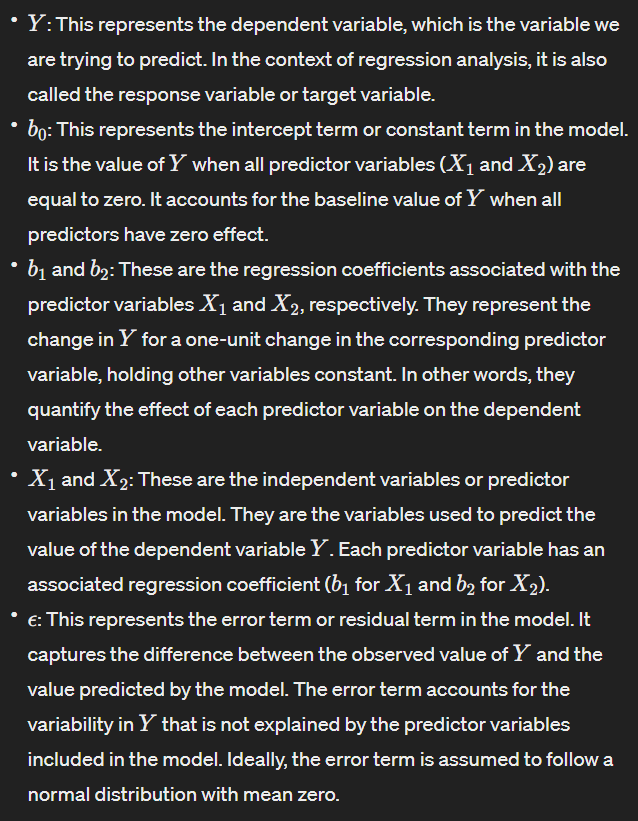

In [31]:
pd.get_dummies(train['Sex'])

# ".get_dummies" method converts categorical variables into indicator/dummy variables 
# we get a dataframe where "1" means if they were that sex (male or female)
# one column is a perfect column predictor of the other column (if it's a "0" for female, the ML algorithm will know it will 
# predict perfectly a "1" for male) -- this issue is called "multicollinearity" 

# a bunch of columns will be perfect predictors of other columns, in order to avoid this, drop the other column ("drop_first=True")

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [32]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

sex.head()

# no longer have "female" column

,male
0,1
1,0
2,0
3,0
4,1


In [33]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

embark.head() 

# we have "Q" and "S" but we don't have "C" column because we dropped it 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
train = pd.concat([train,sex,embark], axis=1) 

# want to add them in as new columns so set axis=1

In [35]:
train.head(2)

# pass in 2 just for 2 rows, and we see that there is only "male" "Q" and "S"
# we don't need "Embarked" and "Sex"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [36]:
# it is best to drop the columns we don't need to use because it can reduce noise, improve model efficiency, avoid overfitting,
# and simplify interpretation.. JUST MAKE SURE IT DOES NOT INTRODUCE BIAS or distorty underlying distribution of data

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

# not going to use "Name" because not easy to pass into an ML algorithm
# "Sex" and "Embarked" is already in "male", "Q", and "S"
# Drop "Ticket" because it's not easy to use that info for ML

In [37]:
train.head()

# perfect for a ML model, no names, no strings, just numbers

# but how does the model know which what to bias on if it's just comparing "S=1" to "Survived=0" (for example)?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
train.tail()

# we can see that passengerid starts at "1" and goes up by "1" per passenger, and it's just an index (not numerical) so we 
# should drop it too (passenger does not survive based off of their index or passenger number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [39]:
train.drop("PassengerId",axis=1,inplace=True)

In [50]:
train

# p class column is a categorical column meaning it can only have "1", "2", or "3"
# that means we can also "pd.get_dummies" for that column (we can first run it as a model as a normal column first)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


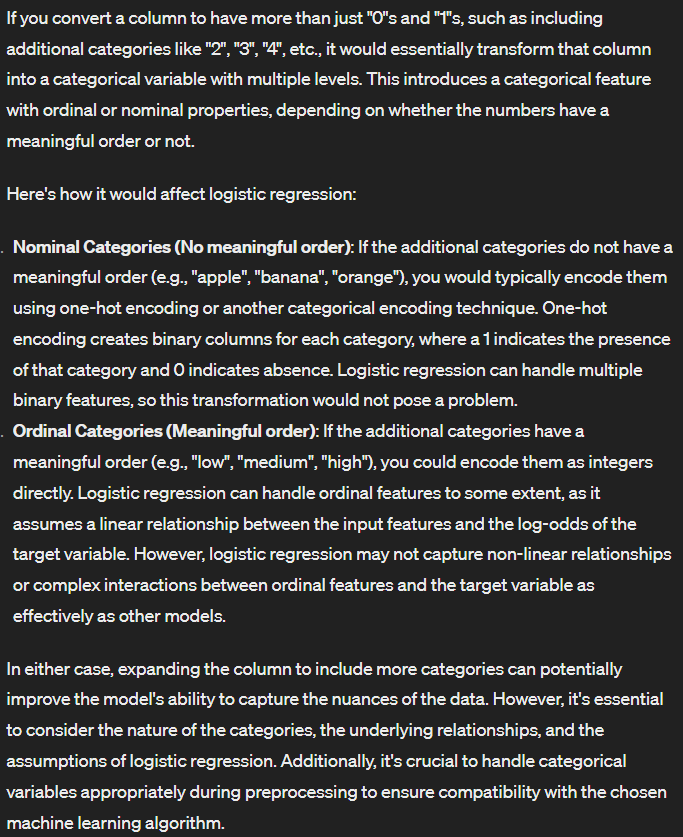

Great! Our data is ready for our model!

# Step 3 Building a Logistic Regression model:

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# we are going to treat "train" as if it was the entirety of the data

# normally, we can just do the cleaning process for the test .csv file and use that as the test set

X = train.drop('Survived', axis=1)
y = train['Survived']

# we used ".drop()" to remove the column labeled "Survived" in the dataframe "train" and the result 
# was assigned to the variable "X", creating a new dataframe "X" by dropping this column

# we assign y to the "Survived" column to serve as the target variable for our ML model representing 
# if the passenger survived or not 

In [ ]:
# don't need to run this, just want to use this for the documentation to copy the "X_train, X_test, y_train" etc. and paste it
train_test_split()


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# we are tuple unpacking in this line (where we are returning a tuple containing 4 elements:
# x_train, X_test, y_train, y_test

# when we this line of code above, python automatically unpacks the element of the tuple returned by "train_test_split()"
# and assigns each element to the corresponding variable on the left-hand side of the assignment statement

# so X_train will be assigned to the first element of the tuple (which is training set of features),
# X_test for the testing set of features, y_train for training set of target variable, and y_test for 
# the testing set of target variable

# the logic behind this model is that "X_train" gives "y_train"-result, and so if we give "X_test" what is predicted "y_test
# -result? and then we compare the predicted "y_test" result with the actual "y_test" result (since we split "y_test" off from 
# the original data set, we know what the y_test is and compare the predicted y_test with it as evaluation metric)

## Training and Predicting

In [45]:
# next step is to train and actually predict a model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# create an instance of the logistic regression

logmodel = LogisticRegression()

In [49]:
logmodel.fit(X_train,y_train)

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

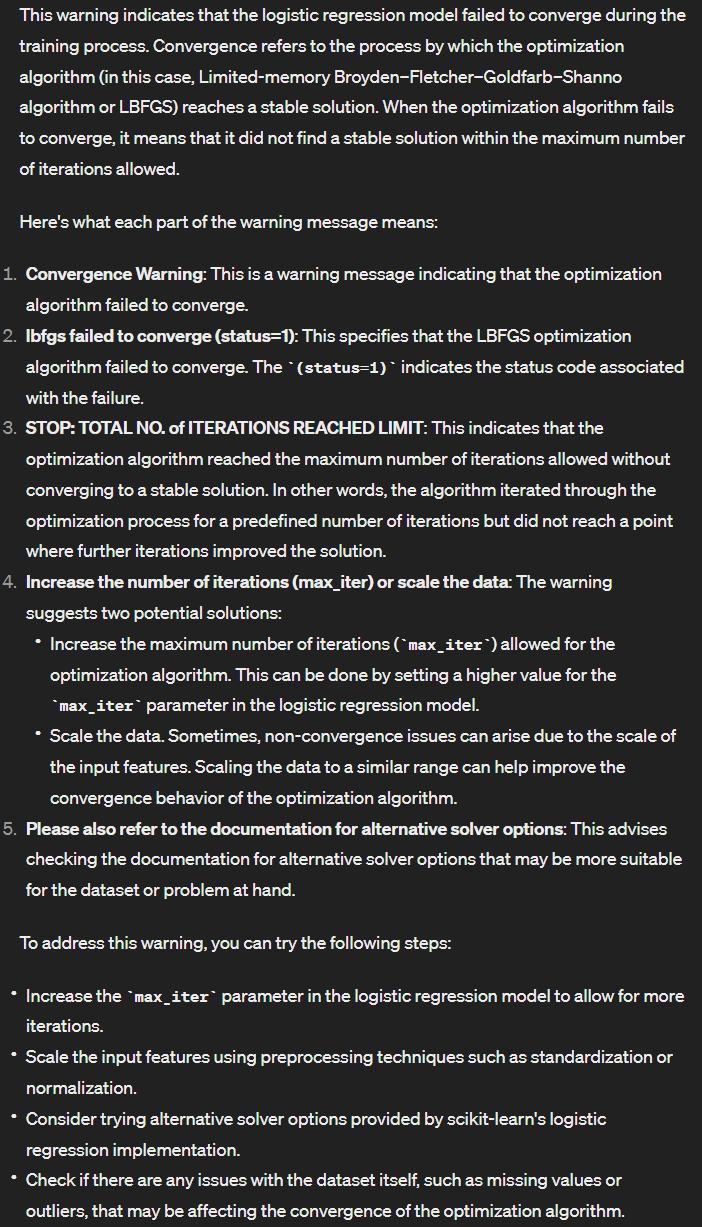

In [51]:
predictions = logmodel.predict(X_test)

## Step 4 Evaluation

We can check precision,recall,f1-score using classification report!

In [53]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predictions))

# why are we testing the predictions against "y_test"? because "y_test" is our target variable and was split off from the 
# original data set (so we know the actual values of "y_test") 

# so then we are comparing the predicted-"y_test" values with the actual-"y_test" values from the original dataset to measure
# performance of our model

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_test,predictions))

# top left 147 is true positives - 147 people were predicted to survive and they did
# 16 is false positives - 16 people were predicted survive but they didn't 
# 30 is false negatives - 30 people were predicted to not survive but they did 
# 74 is true negatives - 74 correctly predicted to not survive and they didn't

[[147  16]
 [ 30  74]]


Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

## Great Job!